In [11]:
from neural_network import *

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from scipy.stats import norm

In [12]:
input_size1 = 5
output_size1 = 2
input_size2 = 3
output_size2 = 2

filename = 'model.pt'

NN = Neural_network(input_size1,output_size1,input_size2,output_size2)

NN.load(filename)
NN.eval()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
def estimate_cost(HV, H, c, phi, gamma, c_cov, phi_cov, gamma_cov, c_operation=5, c_escavation=13, c_failure1=20, c_failure2=10000, expansion=1.2):
    V1, FS, V2, beta = NN.run_model(HV, H, c, phi, gamma, c_cov, phi_cov, gamma_cov)

    area_initial = 0.5*HV*H**2
    area_failure = V2*expansion
    #beta = -norm.ppf(PF)
    PF = norm.cdf(-beta)

    c_construction = area_initial*c_escavation
    c_fail = (area_failure*c_failure1 + c_failure2)*PF

    c_total = c_operation + c_construction + c_fail

    results = {'FS': FS, 'V1': V1, 'beta': beta, 'V2': V2, 'PF': PF, 'c_construction': c_construction, 'c_fail': c_fail, 'c_total': c_total}

    return c_total, results

In [21]:
c = 8; phi = 28; gamma = 20; c_cov = 15; phi_cov = 26; gamma_cov = 9
H = 10; hv = 1.5
c_total, r = estimate_cost(hv, H, c, phi, gamma, c_cov, phi_cov, gamma_cov)
r

{'FS': 1.4411204376882838,
 'V1': 52.52065290963503,
 'beta': 1.7037286903138047,
 'V2': 95.16912012872706,
 'PF': 0.044215892778952715,
 'c_construction': 975.0,
 'c_fail': 543.1506304650247,
 'c_total': 1523.1506304650247}

In [22]:
HVs = np.arange(0.5,2.5,1./16)

#c = 8; phi = 28; gamma = 20; c_cov = 15; phi_cov = 26; gamma_cov = 9; H = 20
c = 8.3; phi = 31.6; gamma = 15; c_cov = 30; phi_cov = 20; gamma_cov = 7; H = 10

FSs = []
betas = []
PFs = []

c_totals = []
c_fails = []
c_initials = []

for hv in HVs:
    c_total, r = estimate_cost(hv, H, c, phi, gamma, c_cov, phi_cov, gamma_cov)
    FSs.append(r['FS'])
    betas.append(r['beta'])
    PFs.append(r['PF'])

    c_totals.append(c_total)
    c_fails.append(r['c_fail'])
    c_initials.append(r['c_construction']+5)

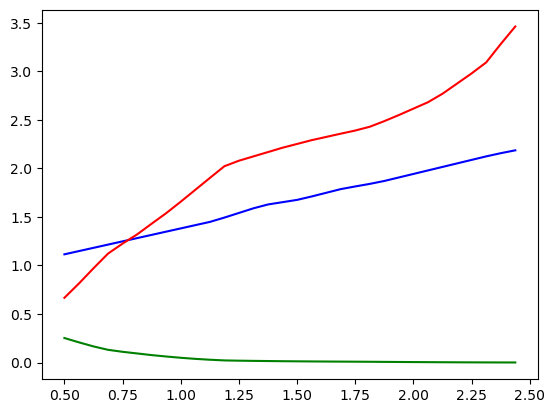

In [23]:
plt.plot(HVs,FSs,'b')
plt.plot(HVs,betas,'r')
plt.plot(HVs,PFs,'g')

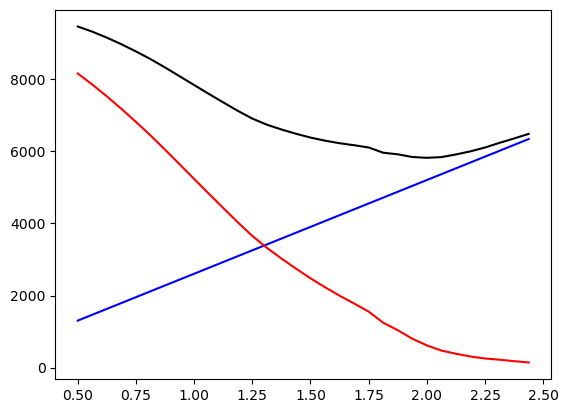

In [20]:
plt.plot(HVs,c_initials,'b')
plt.plot(HVs,c_fails,'r')
plt.plot(HVs,c_totals,'k')